In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('CC GENERAL.csv')
df.drop('CUST_ID', axis=1, inplace=True)
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean())
df = df.dropna(axis = 0, subset = ['CREDIT_LIMIT'])

In [3]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.shape

(8949, 17)

In [107]:
class PCA():

    def __init__(self, n_components=0.95):
        self.n_components = n_components
        if self.n_components > 1:
            self.type = 'var'
        else:
            self.type = 'ratio'

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
        standardized_data = (X - self.mean) / self.std
        #print(self.mean.shape)

        cov_matrix = np.cov(standardized_data.T)
        #print(cov_matrix.shape)

        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
        #print(eigenvectors.shape)
        #print(eigenvalues.shape)

        sorted_indices = np.argsort(eigenvalues)[::-1]
        #arg sort-> returns sorted indices ascendingly, so we reverse it to get descending order. or np.flip()
        eigenvectors = eigenvectors[:, sorted_indices]  #take all rows, and sort cols by sorted_indices

        if self.type == 'var':
            self.components = eigenvectors[:self.n_components]
        else:
            self.components_ratio = eigenvalues[sorted_indices] / np.sum(eigenvalues)
            #print(self.components_ratio.shape)
            cumu_sum = np.cumsum(self.components_ratio)
            #print(cumu_sum.shape)
            self.components = eigenvectors[:,cumu_sum<=self.n_components]
            #print(self.components.shape)

    def transform(self, Z):
        standardized_data = (Z - self.mean) / self.std
        transformed_data = np.dot(standardized_data, self.components)

        return transformed_data

    def plot_explained_variance(self):
            if self.type == 'var':
                plt.plot(np.arange(1, len(self.components) + 1), np.cumsum(self.components))
                plt.xlabel('comps')
                plt.ylabel('Cumulative explained variance')
                plt.title('Elbow Plot ')
                plt.show()
            else:
                plt.plot(np.arange(1, len(self.components_ratio) + 1), np.cumsum(self.components_ratio))
                plt.xlabel('comps')
                plt.ylabel('Cumulative explained variance ratio')
                plt.title('Elbow Plot ')
                plt.show()

In [108]:
pca_section = PCA(n_components=0.95)
X_transformed = pca_section.fit(df.values) 

In [97]:
print(pca_section.components.shape)
print("expected shape: (17,11)")

(17, 11)
expected shape: (17,11)


In [98]:
pca_section.transform(df.values).shape

(8949, 11)

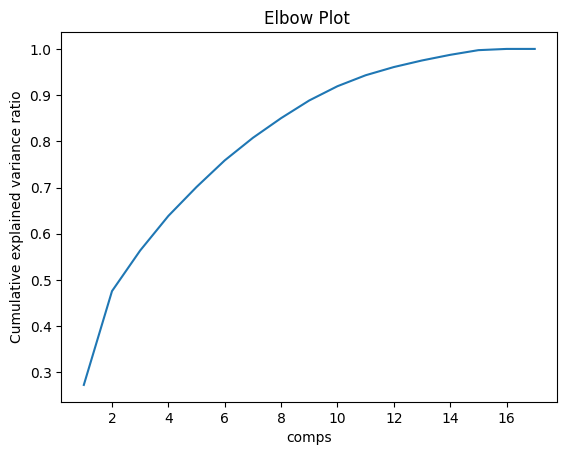

In [140]:
pca_section.plot_explained_variance()

In [79]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
pca.fit(df.values)
print(pca.components_.shape)

(5, 17)


In [80]:
# /std -> 11, /var -> 5